In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import seed
from random import randrange
from dataloader import load_data
from PCA import PCA as pca
import random
import math

In [2]:
def sigmoid(x):
    """ A cleaner version but, can't think of why the other version could cause problems """
    return (1/(1 + np.exp(-1*x)))

In [3]:
def initialize_parameters(dim):
    """ Returns a list of parameters of dimension (dim x 1)"""
    #w = np.random.rand(dim, 1)
    w = np.zeros((dim, 1))
    b = 0
    return w, b

def cost_function(w, b, X, Y):
    """ Used to compute binary cross entropy loss function """
    epsilon = 1e-15
    # Shape of w = d x 1
    # Shape of X = M x d
    sigmoid_coeff = (np.dot(X, w)) + b
    val = sigmoid(sigmoid_coeff) + epsilon

    A = np.log(val)
    B = np.log(1 - val)
    C = np.multiply(Y, A)
    D = np.multiply(1 - Y, B)
    # Here, we are computing the values of A, B, C and D
    J = -1 * ((np.multiply(Y, A) + np.multiply((1-Y), B)))
    cost = np.sum(J, axis=0) / X.shape[0]
    cost = np.squeeze(cost)
    return cost

def predict_output(w, b, X):
    """ Output prediction """
    m = X.shape[0]
    Y_prediction = np.zeros((m, 1))
    sigmoid_coeff = (np.dot(X, w)) + b
    A = sigmoid(sigmoid_coeff)
    Y_prediction = np.where(A > 0.5, 1, 0)
    return Y_prediction
    
def gradient_computation(w, b, X, Y):
    """ Computes the gradient to be used for logistic regression """
    # Shape of w = d x 1
    # Shape of X = M x d
    #Y_prediction = predict_output(w, b, X)
    sigmoid_coeff = (np.dot(X, w)) + b
    A = sigmoid(sigmoid_coeff)
    difference = Y - A
    dw = np.dot(X.transpose(), difference)/X.shape[0]
    #print("Shape of dw = {}".format(dw.shape))
    db = np.squeeze(np.sum(difference, axis=0))/X.shape[0]
    
    return [dw, db]

In [4]:
def prepare_data(category1, category2, train, val, test, debug_mode):
    """
        Take the inputs from categories 1 and 2
        Random shuffle them and provide X_train, X_test and X_val
        Similarly prepare Y_train, Y_test and Y_val
    """
    # What are the different number of samples required for the different categories?
    numSamples_c1 = len(category1)
    numSamples_c2 = len(category2)
    
    # Computed elements from the training set
    # for all of C1 and C2
    train_c1 = int(train * len(category1)/100)
    test_c1 = int(test * len(category1)/100)
    val_c1 = int(val * len(category1)/100)
    
    train_c2 = int(train * len(category2)/100)
    test_c2 = int(test * len(category2)/100)
    val_c2 = int(val * len(category2)/100)
    
    train_data, test_data, val_data = [], [], []
    
    height, width = category1[0].shape[0], category1[0].shape[1]
    
    if(debug_mode):
        print("Height and widths of images are {} and {}".format(height, width))
    
    for idx in range(len(category1)):
        sample = category1[idx]
        sample = sample.reshape(1, (height * width))
        newSample = np.zeros((1, ((height*width) + 1)))
        newSample[0, :height*width] = sample
        newSample[0, height*width] = 0
        
        if(idx < train_c1):
            train_data.append(newSample)
        elif(idx >= train_c2 and idx < train_c1 + test_c1):
            test_data.append(newSample)
        elif(idx >= train_c2 + test_c2 and idx < train_c2 + test_c2 + val_c2):
            val_data.append(newSample)
            
    for idx in range(len(category2)):
        sample = category2[idx]
        sample = sample.reshape(1, (height * width))
        newSample = np.zeros((1, ((height*width) + 1)))
        newSample[0, :height*width] = sample
        newSample[0, height*width] = 1
        if(idx < train_c2):
            train_data.append(newSample)
        elif(idx >= train_c2 and idx < train_c2 + test_c2):
            test_data.append(newSample)
        elif(idx >= train_c1 + test_c1 and idx < train_c1 + test_c1 + val_c1):
            val_data.append(newSample)
            
    random.shuffle(train_data)
    random.shuffle(test_data)
    random.shuffle(val_data)
       
    X_train, X_test, X_val = [], [], []
    Y_train, Y_test, Y_val = [], [], []
    # Finding different samples in train_data, test_data and val_data respectively
    for sample in train_data:
        X_train.append(sample[0, :height*width])
        Y_train.append(sample[0, -1])
    for sample in test_data:
        X_test.append(sample[0, :height*width])
        Y_test.append(sample[0, -1])
    for sample in val_data:
        X_val.append(sample[0, :height*width])
        Y_val.append(sample[0, -1])
    
    return X_train, X_test, X_val, Y_train, Y_test, Y_val

Car types: ['Convertible', 'Minivan'] 

Convertible: 150 # of images
Minivan: 150 # of images
Height and widths of images are 200 and 300
[7]
Shape of projected_data_train = (240, 7)
Shape of projected_data_test = (30, 7)
Shape of projected_data_val = (30, 7)
Shape of new_Y_train = (240, 1)
Shape of new_Y_test = (30, 1)
Shape of new_Y_val = (30, 1)
Shape of w = (7, 1)
At iteration 0, training_cost, val_cost, testing_cost = 0.6931471805599454, 0.6930608111985552 and 0.6930420671691954
Shape of w = (7, 1)
At iteration 1, training_cost, val_cost, testing_cost = 0.6930627437104245, 0.6929746046021165 and 0.6929371278365656
Shape of w = (7, 1)
At iteration 2, training_cost, val_cost, testing_cost = 0.6929784826793454, 0.6928885604493823 and 0.6928323622462016
Shape of w = (7, 1)
At iteration 3, training_cost, val_cost, testing_cost = 0.6928943971004714, 0.6928026784196594 and 0.6927277700827682
Shape of w = (7, 1)
At iteration 4, training_cost, val_cost, testing_cost = 0.6928104866082191, 0

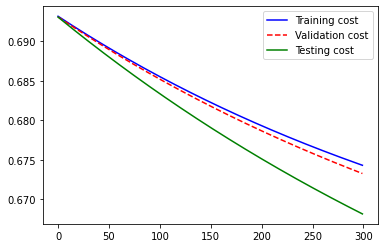

In [5]:
def extract_projections(X, eigen_vectors, singular_values):
    """ Here, we extract the projections using the X vector, eigen_vectors and the singular values """
    mean_image = np.mean(X, axis = 0)
    msd = X - mean_image
    projected = np.matmul(msd, eigen_vectors)/singular_values
    return projected

def question5a_b(images, numEpochs = 300, debug_mode = False):
    """ Question 5(a) and 5(b) forms the function """
    # Four types of cars
    dt_convertible = images['Convertible']
    dt_minivan = images['Minivan']
    dt_sedan = images['Sedan']
    dt_pickup = images['Pickup']
    
    learning_rate = 1
    
    X_train, X_test, X_val, Y_train, Y_test, Y_val = prepare_data(dt_convertible, dt_minivan, 80, 10, 10, debug_mode)
    
    principalComponents = [7]
    print(principalComponents)
    
    for PC in principalComponents:    
        # Computing projected_image, mean_image, singular_values should also be done aptly
        [projected_data_train, mean_image_train, singular_values_train, eigenvectors_train] = pca(X_train, PC)
        # Test set
        mean_test = np.mean(X_test, axis=0)
        msd_test = X_test - mean_test
        projected_data_test = np.matmul(msd_test, eigenvectors_train)/singular_values_train

        # Validation set
        mean_val = np.mean(X_val, axis=0)
        msd_val = X_val - mean_val
        projected_data_val = np.matmul(msd_val, eigenvectors_train)/singular_values_train
        
        if(debug_mode):
            print("Shape of projected_data_train = {}".format(projected_data_train.shape))
            print("Shape of projected_data_test = {}".format(projected_data_test.shape))
            print("Shape of projected_data_val = {}".format(projected_data_val.shape))
        
        # Features extracted from the dataset
        new_X_train = projected_data_train
        new_X_test = projected_data_test
        new_X_val = projected_data_val
        
        # Thus, we obtain the different values for Y_train, Y_test and Y_val
        new_Y_train = np.array(Y_train).reshape(new_X_train.shape[0], 1)
        new_Y_test = np.array(Y_test).reshape(new_X_test.shape[0], 1)
        new_Y_val = np.array(Y_val).reshape(new_X_val.shape[0], 1)
        
        if(debug_mode):
            print("Shape of new_Y_train = {}".format(new_Y_train.shape))
            print("Shape of new_Y_test = {}".format(new_Y_test.shape))
            print("Shape of new_Y_val = {}".format(new_Y_val.shape))
        
        # Cost values
        total_cost = 0
        training_costs = []
        validation_costs = []
        testing_costs = []
        
        # Dimension of weights
        dim = new_X_train.shape[1]
        w, b = initialize_parameters(dim)
        
        prev_val_cost = 10000
        
        w_best = w
        b_best = b
        training_iterations = 0
        for epoch in range(numEpochs):
            [dw, db] = gradient_computation(w, b, new_X_train, new_Y_train)
            training_cost = cost_function(w, b, new_X_train, new_Y_train)
            w = w + learning_rate * dw
            b = b + learning_rate * db
            validation_cost = cost_function(w, b, new_X_val, new_Y_val)
            testing_cost = cost_function(w, b, new_X_test, new_Y_test)
            
            # Shape of w and b are provided as follows -
            print("Shape of w = {}".format(w.shape))
            
            training_costs.append(training_cost)
            validation_costs.append(validation_cost)
            testing_costs.append(testing_cost)
            
            if(validation_cost < prev_val_cost):
                prev_val_cost = validation_cost
                w_best = w
                b_best = b
                training_iterations += 1
            else:
                print('EARLY STOPPING: at iteration = {}'.format(epoch))
                training_iterations = epoch
                break
            
            # Here, we have all the 3 types of costs to be use
            
            
            # debug_mode is "TRUE"
            if(debug_mode):
                print("At iteration {}, training_cost, val_cost, testing_cost = {}, {} and {}".\
                      format(epoch, training_cost, validation_cost, testing_cost))
        
        # Computing the stats of the best model
        Y_prediction_test = predict_output(w_best, b_best, new_X_test)
        Y_prediction_val = predict_output(w_best, b_best, new_X_val)
        
        test_accuracy = sum(Y_prediction_test == new_Y_test)/len(Y_prediction_test) * 100
        val_accuracy = sum(Y_prediction_val == new_Y_val)/len(Y_prediction_val) * 100
    
        print("Testing set accuracy is {}".format(test_accuracy))
        print("Validation set accuracy is {}".format(val_accuracy))
        print("Training iterations = {}".format(training_iterations))
        if(training_iterations < 299):
            x = [i for i in range(training_iterations+1)]
        else:
            x = [i for i in range(training_iterations)]
            
        #print(x)
        #print(training_costs)
        fig, ax = plt.subplots()
        ax.plot(x, training_costs, '-b', label='Training cost')
        ax.plot(x, validation_costs, '--r', label='Validation cost')
        ax.plot(x, testing_costs, 'g', label='Testing cost')
        leg = ax.legend();
        plt.show()
        
if __name__ == '__main__':
    images, cnt = load_data(data_dir="./resized/")
    question5a_b(images,300, True)